<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [233]:
# Creación de las listas de los datos
def data_txt(archivo):
    lista = []

# Abrirmos el archivo para su lectura 
    with open(archivo) as f:
    # Utilizamos el método readlines de los Objetos Archivo para guardar en una lista las líneas del archivo
        alist = [line.rstrip("\r\n") for line in f]

    return alist

In [234]:
# Lectura de datos desde los .txt

my_data_edad = list(map(int,data_txt("edad.txt")))
my_data_genero = data_txt("genero.txt")
my_data_estado_civil = data_txt("estado_civil.txt")
my_data_escolaridad = data_txt("escolaridad.txt")
my_data_estrato = list(map(int,data_txt("estrato.txt")))
my_data_region = data_txt("region.txt")
my_data_promedio = list(map(float,data_txt("promedio.txt")))
archivos=[my_data_edad,my_data_genero,my_data_estado_civil,my_data_escolaridad,my_data_estrato,my_data_region,my_data_promedio]


**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

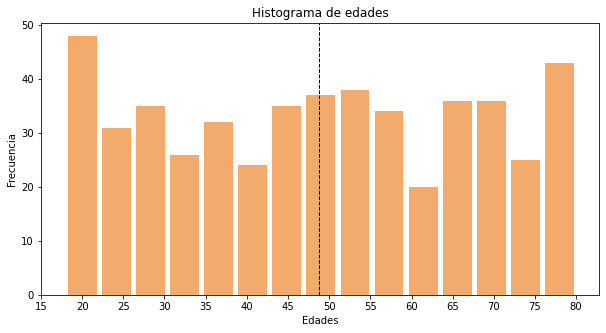

In [235]:
#variables numericas:

# importación de paquetes necesarios
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plot

#EDAD:
# función que calcula la media de una lista de datos numéricos
media_edad= np.mean(my_data_edad)
media_edad
#histograma
fig=plot.subplots(figsize=(10,5))
plot.hist(x=my_data_edad, bins=15, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de edades')
plot.xlabel('Edades')
plot.ylabel('Frecuencia')
plot.xticks([15,20,25,30,35,40,45,50,55,60,65,70,75,80])
plot.axvline(media_edad, color='k', linestyle='dashed', linewidth=1)

plot.show() #dibujamos el histograma

In [324]:
#mediana de la edad 
mediana_edad= np.median(my_data_edad)
#moda de la edad 
moda_edad= stats.mode(my_data_edad)
moda_edad

ModeResult(mode=array([24]), count=array([14]))

In [325]:
#Desviación estandar de la edad 
desv_estandar_edad=np.std(my_data_edad)
varianza_edad= np.var(my_data_edad)
desv_estandar_edad

18.59485133040864

In [18]:
#Conteo de tipos de genero 
from collections import Counter
contador_genero =Counter(my_data_genero)
contador_genero

Counter({'masculino': 204, 'femenino': 251, 'otro': 6, 'no binario': 39})

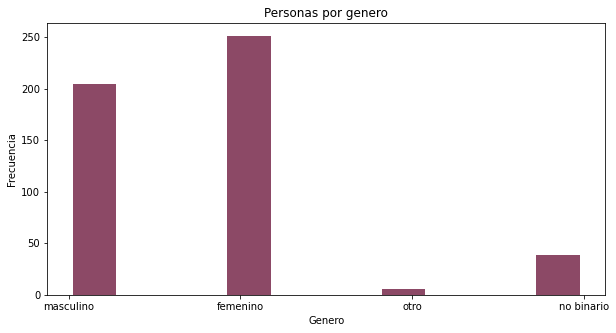

In [21]:
#histograma tipos de genero
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_genero, color='#8C4966', rwidth=0.85)
plot.title('Personas por genero')
plot.xlabel('Genero')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

In [162]:
#Contador de estudiantes segun su estado civil:
contador_estado_civil =Counter(my_data_estado_civil)
contador_estado_civil

Counter({'casada': 199, 'divorciada': 137, 'soltera': 148, 'viuda': 16})

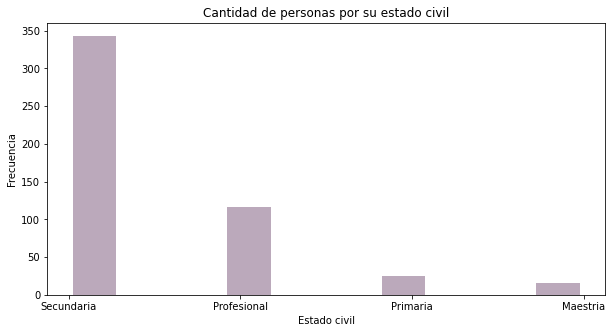

In [166]:
#Estado civil
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_escolaridad, color="#BBA9BB", rwidth=0.85)
plot.title('Cantidad de personas por su estado civil')
plot.xlabel('Estado civil')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

In [158]:
#Contador de estudiantes segun el nivel de escolaridad:
contador_escolaridad =Counter(my_data_escolaridad)
contador_escolaridad

Counter({'Secundaria': 343,
         'Profesional': 117,
         'Primaria': 25,
         'Maestria': 15})

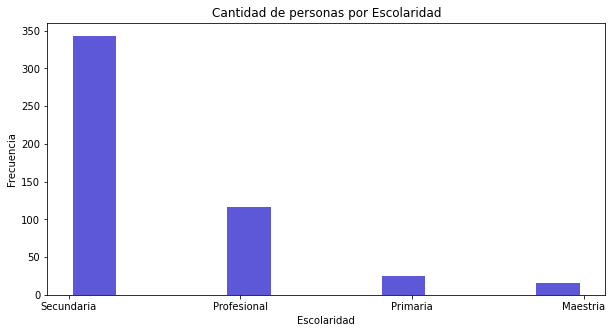

In [163]:
#Escolaridad
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_escolaridad, color="#5D58D7", rwidth=0.85)
plot.title('Cantidad de personas por Escolaridad')
plot.xlabel('Escolaridad')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

In [155]:
#Contador de estudiantes segun el estrato de su vivienda:
contador_estrato =Counter(my_data_estrato )
contador_estrato

Counter({5: 13, 1: 111, 3: 156, 2: 185, 4: 35})

In [168]:
#ESTRATO
#mediana del estrato
mediana_estrato= np.median(my_data_estrato)
#moda del estrato 
moda_estrato= stats.mode(my_data_estrato)
moda_edad

ModeResult(mode=array([2]), count=array([185]))

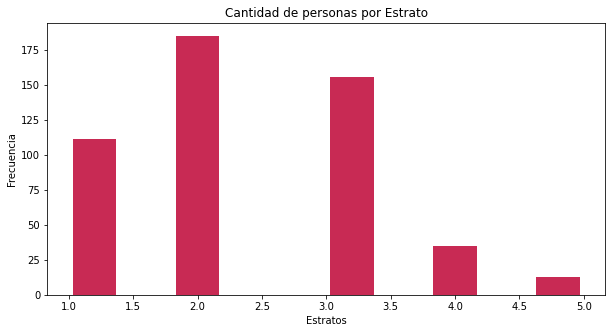

In [156]:
#Estrato
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_estrato, color="#C82A54", rwidth=0.85)
plot.title('Cantidad de personas por Estrato')
plot.xlabel('Estratos')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

In [128]:
#Contador de personas por región
contador_region =Counter(my_data_region)
contador_region 

Counter({'Andina': 142,
         'Pacifica': 117,
         'Orinoquia': 33,
         'Caribe': 193,
         'Amazonia': 15})

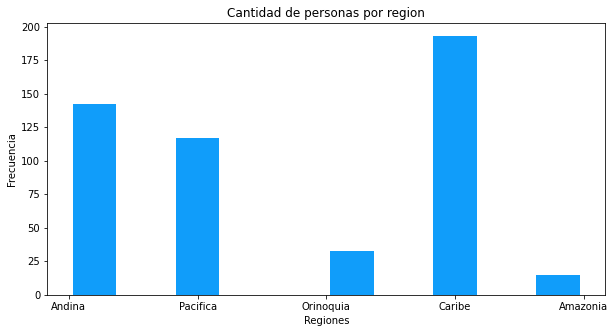

In [136]:
#Regiones
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_region, color="#109DFA", rwidth=0.85)
plot.title('Cantidad de personas por region')
plot.xlabel('Regiones')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

In [170]:
#Contador de personas por promedio
contador_promedio =Counter(my_data_promedio)
contador_promedio

Counter({2.4: 18,
         0.9: 7,
         3.2: 14,
         2.1: 22,
         2.0: 18,
         2.7: 14,
         4.9: 7,
         4.5: 4,
         3.0: 37,
         3.5: 19,
         1.8: 10,
         1.2: 9,
         0.1: 5,
         1.0: 10,
         3.9: 11,
         2.9: 16,
         4.3: 4,
         2.3: 15,
         2.6: 13,
         2.8: 8,
         3.7: 15,
         3.3: 13,
         1.9: 11,
         1.7: 7,
         2.5: 14,
         1.5: 8,
         4.1: 4,
         3.8: 11,
         1.1: 8,
         3.1: 18,
         2.2: 15,
         0.8: 3,
         4.0: 14,
         0.0: 4,
         3.4: 15,
         4.7: 2,
         3.6: 16,
         1.4: 6,
         1.6: 5,
         1.3: 10,
         4.2: 6,
         4.8: 4,
         0.2: 7,
         4.6: 2,
         4.4: 4,
         0.5: 3,
         5.0: 2,
         0.3: 3,
         0.4: 2,
         0.7: 2,
         0.6: 5})

In [169]:
#Promedio
#mediana del promedio
mediana_promedio= np.median(my_data_promedio )
#moda del promedio 
moda_promedio= stats.mode(my_data_promedio )
moda_promedio

ModeResult(mode=array([3.]), count=array([37]))

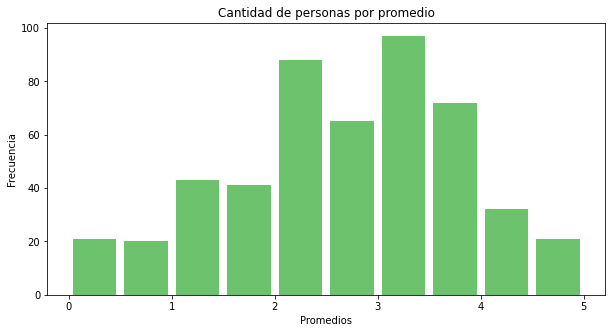

In [173]:
#Regiones
fig=plot.subplots(figsize=(10,5))
plot.hist(my_data_promedio, color="#6dc36d", rwidth=0.85)
plot.title('Cantidad de personas por promedio')
plot.xlabel('Promedios')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [ ]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = 'Se requiere verificar el mejor modelo de asignación de becas teniendo en cuenta los factores mas trascendentales para la población '

pregunta_analytics = 'Cuales criterios de entrega de becas se deben de tener en cuenta que resulten en mejores resultados para las poblaciones de Colombia, región de procedencia, estrato socioeconomico o genero  '

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [146]:
def itemgetter(*items):
    if len(items) ==1:
        item=items[0]
        def g(obj):
            return obj[item]
    else:
        def g(obj):
            return tuple(obj[item] for item in items)
    return g

In [137]:
import math
est1=1
est2=2
est3=3
est4=4
est5=5
becas_asig=0
num_becas= 40
id_listas= list(range(1, 501))
zipped_lists= zip(id_listas, my_data_estrato,my_data_promedio)
est_dic_id = sorted(zipped_lists)
est=[1,2,3,4,5]
e=1
becas_est_1=[]
becas_est_2=[]
becas_est_3=[]
becas_est_4=[]
becas_est_5=[]
becas_est_as=[]

def subpoblacion(nombreest):
    est=[]
    for (indice,estrato,promedio) in est_dic_id:
        if estrato==nombreest:
            t=(indice, estrato,promedio)
            est.append(t)
    est_id=sorted(est,key=itemgetter(2), reverse=True)
    return est_id

estrato_1_id=subpoblacion(est1)
estrato_2_id=subpoblacion(est2)
estrato_3_id=subpoblacion(est3)
estrato_4_id=subpoblacion(est4)
estrato_5_id=subpoblacion(est5)


#Asignación de becas

while becas_asig<num_becas:
    firts=math.ceil(len(estrato_1_id)*0.02)
    second=math.ceil(len(estrato_2_id)*0.02)
    third=math.ceil(len(estrato_3_id)*0.02)
    fourth=math.ceil(len(estrato_4_id)*0.02)
    fifth=math.ceil(len(estrato_5_id)*0.02)
    
    for e in est:
        if becas_asig<(num_becas-firts):
            e=1
            if e==1:
                for i in range(firts):
                    becas_asig+=1
                    estrato_1_mod=estrato_1_id.pop(i)
                    becas_est_1.append(estrato_1_mod)
                    becas_est_as.append(estrato_1_mod)
            if becas_asig<(num_becas-second):
                e=2
                if e==2:
                    for i in range(second):
                        becas_asig+=1
                        estrato_2_mod=estrato_2_id.pop(i)
                        becas_est_2.append(estrato_2_mod)
                        becas_est_as.append(estrato_2_mod)
            if becas_asig<(num_becas-third):
                e=3
                if e==3:
                    for i in range(third):
                        becas_asig+=1
                        estrato_3_mod=estrato_3_id.pop(i)
                        becas_est_3.append(estrato_3_mod)
                        becas_est_as.append(estrato_3_mod)  
            if becas_asig<(num_becas-fourth):
                e=4
                if e==4:
                    for i in range(fourth):
                        becas_asig+=1
                        estrato_4_mod=estrato_4_id.pop(i)
                        becas_est_4.append(estrato_4_mod)
                        becas_est_as.append(estrato_4_mod)   
            if becas_asig<(num_becas-fifth):
                e=5
                if e==5:
                    for i in range(fifth):
                        becas_asig+=1
                        estrato_5_mod=estrato_5_id.pop(i)
                        becas_est_5.append(estrato_5_mod)
                        becas_est_as.append(estrato_5_mod)
         
        else: becas_asig = num_becas

becas_estratos=[becas_est_1,becas_est_2,becas_est_3,becas_est_4,becas_est_5]
print("Las becas otorgadas por estrato en orden ascendente y por promedio son: (ID persona Admitida, Estrato Persona Admitida, Promedio Persona Admitida) = ")
print(becas_estratos)
                   

Las becas otorgadas por estrato en orden ascendente y por promedio son: (ID persona Admitida, Estrato Persona Admitida, Promedio Persona Admitida) = 
[[(377, 1, 5.0), (364, 1, 4.9), (386, 1, 4.7), (163, 1, 4.9), (288, 1, 4.3), (423, 1, 4.2), (284, 1, 4.8), (109, 1, 4.1), (251, 1, 4.0)], [(244, 2, 5.0), (208, 2, 4.9), (138, 2, 4.8), (410, 2, 4.5), (8, 2, 4.9), (479, 2, 4.6), (223, 2, 4.4), (356, 2, 4.4), (492, 2, 4.9), (309, 2, 4.4), (71, 2, 4.3), (97, 2, 4.0)], [(61, 3, 4.9), (110, 3, 4.7), (10, 3, 4.5), (162, 3, 4.4), (472, 3, 4.9), (50, 3, 4.5), (257, 3, 4.2), (454, 3, 4.2), (160, 3, 4.6), (429, 3, 4.2), (455, 3, 4.1), (80, 3, 4.0)], [(395, 4, 4.8), (54, 4, 3.9), (379, 4, 3.7)], [(260, 5, 4.8), (100, 5, 3.4), (39, 5, 3.3)]]


**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [147]:
def subpoblacion(nombrereg,nombregenero):
    reg=[]
    for (indice,region,genero,promedio) in lista_mision5:
        if region==nombrereg:
            if genero==nombregenero:
                t=(indice,region,genero,promedio)
                reg.append(t)
    reg_id=sorted(reg, key=itemgetter(3), reverse=True) 
    return reg_id

In [150]:
import math

id_lista_2= list(range(1, 501))
zipped_lists5= zip(id_lista_2, my_data_region,my_data_genero,my_data_promedio)
lista_mision5 = sorted(zipped_lists5)
#Variables
num_becas=45
region_andina="Andina"
region_pacifica="Pacifica"
region_orinoquia="Orinoquia"
region_caribe="Caribe"
region_amazonica="Amazonia"
femenino="femenino"
masculino="masculino"
nb="no binario"
otro="otro"
becas_asig_2=0
becas_est_andina_fem=[]
becas_est_andina_masc=[]
becas_est_andina_nb=[]
becas_est_andina_ot=[]
becas_est_pacifica_fem=[]
becas_est_pacifica_masc=[]
becas_est_pacifica_nb=[]
becas_est_pacifica_ot=[]
becas_est_orinoquia_fem=[]
becas_est_orinoquia_masc=[]
becas_est_orinoquia_nb=[]
becas_est_orinoquia_ot=[]
becas_est_caribe_fem=[]
becas_est_caribe_masc=[]
becas_est_caribe_nb=[]
becas_est_caribe_ot=[]
becas_est_amazonia_fem=[]
becas_est_amazonia_masc=[]
becas_est_amazonia_nb=[]
becas_est_amazonia_ot=[]
becas_assign=[]


andina_id_fem=subpoblacion(region_amazonica, femenino)  
andina_id_masc=subpoblacion(region_amazonica, masculino)
andina_id_nb=subpoblacion(region_amazonica, nb)
andina_id_ot=subpoblacion(region_amazonica, otro)

pacifica_id_fem=subpoblacion(region_pacifica, femenino)  
pacifica_id_masc=subpoblacion(region_pacifica, masculino)
pacifica_id_nb=subpoblacion(region_pacifica, nb)
pacifica_id_ot=subpoblacion(region_pacifica, otro)

orinoquia_id_fem=subpoblacion(region_orinoquia, femenino)  
orinoquia_id_masc=subpoblacion(region_orinoquia, masculino)
orinoquia_id_nb=subpoblacion(region_orinoquia, nb)
orinoquia_id_ot=subpoblacion(region_orinoquia, otro)

caribe_id_fem=subpoblacion(region_caribe, femenino)  
caribe_id_masc=subpoblacion(region_caribe, masculino)
caribe_id_nb=subpoblacion(region_caribe, nb)
caribe_id_ot=subpoblacion(region_caribe, otro)

amazonia_id_fem=subpoblacion(region_amazonica, femenino)  
amazonia_id_masc=subpoblacion(region_amazonica, masculino)
amazonia_id_nb=subpoblacion(region_amazonica, nb)
amazonia_id_ot=subpoblacion(region_amazonica, otro)

#Asignación de becas considerando, cada sub-poblacion:

while becas_asig_2<num_becas:   
    i=0   
    #Asignación de becas Región Andina
    if i<len(andina_id_fem):  
        if becas_asig_2<num_becas:
            andina_id_fem_mod=andina_id_fem.pop(i)
            becas_est_andina_fem.append(andina_id_fem_mod) 
            becas_assign.append(andina_id_fem_mod)
            becas_asig_2+=1

    if i<len(andina_id_masc):
        if becas_asig_2<num_becas:
            andina_id_masc_mod=andina_id_masc.pop(i)
            becas_est_andina_masc.append(andina_id_masc_mod)
            becas_assign.append(andina_id_masc_mod)
            becas_asig_2+=1

    if i<len(andina_id_nb):
        if becas_asig_2<num_becas:
            andina_id_nb_mod=andina_id_nb.pop(i)
            becas_est_andina_nb.append(andina_id_nb_mod) 
            becas_assign.append(andina_id_nb_mod)
            becas_asig_2+=1

    if i<len(andina_id_ot):
        if becas_asig_2<num_becas:
            andina_id_ot_mod=andina_id_ot.pop(i)
            becas_est_andina_ot.append(andina_id_ot_mod)
            becas_assign.append(andina_id_ot_mod)
            becas_asig_2+=1

        
    #Asignación de becas Región Pacifica        
    if i<len(pacifica_id_fem):  
        if becas_asig_2<num_becas:
            pacifica_id_fem_mod=pacifica_id_fem.pop(i)
            becas_est_pacifica_fem.append(pacifica_id_fem_mod) 
            becas_assign.append(pacifica_id_fem_mod)
            becas_asig_2+=1
            
    if i<len(pacifica_id_masc):
        if becas_asig_2<num_becas:
            pacifica_id_masc_mod=pacifica_id_masc.pop(i)
            becas_est_pacifica_masc.append(pacifica_id_masc_mod)
            becas_assign.append(pacifica_id_masc_mod)
            becas_asig_2+=1

    if i<len(pacifica_id_nb):
        if becas_asig_2<num_becas:   
            pacifica_id_nb_mod=pacifica_id_nb.pop(i)
            becas_est_pacifica_nb.append(pacifica_id_nb_mod) 
            becas_assign.append(pacifica_id_nb_mod)
            becas_asig_2+=1

    if i<len(pacifica_id_ot):
        if becas_asig_2<num_becas:
            pacifica_id_ot_mod=pacifica_id_ot.pop(i)
            becas_est_pacifica_ot.append(pacifica_id_ot_mod)
            becas_assign.append(pacifica_id_ot_mod)
            becas_asig_2+=1
        
        #Asignación de becas Región Orinoquia        
    if i<len(orinoquia_id_fem):  
        if becas_asig_2<num_becas:
            orinoquia_id_fem_mod=orinoquia_id_fem.pop(i)
            becas_est_orinoquia_fem.append(orinoquia_id_fem_mod) 
            becas_assign.append(orinoquia_id_fem_mod)
            becas_asig_2+=1
            
    if i<len(orinoquia_id_masc):
        if becas_asig_2<num_becas:
            orinoquia_id_masc_mod=orinoquia_id_masc.pop(i)
            becas_est_orinoquia_masc.append(orinoquia_id_masc_mod)
            becas_assign.append(orinoquia_id_masc_mod)
            becas_asig_2+=1

    if i<len(orinoquia_id_nb):
        if becas_asig_2<num_becas:   
            orinoquia_id_nb_mod=orinoquia_id_nb.pop(i)
            becas_est_orinoquia_nb.append(orinoquia_id_nb_mod) 
            becas_assign.append(orinoquia_id_nb_mod)
            becas_asig_2+=1

    if i<len(orinoquia_id_ot):
        if becas_asig_2<num_becas:
            orinoquia_id_ot_mod=orinoquia_id_ot.pop(i)
            becas_est_orinoquia_ot.append(orinoquia_id_ot_mod)
            becas_assign.append(orinoquia_id_ot_mod)
            becas_asig_2+=1
        
        #Asignación de becas Región Caribe        
    if i<len(caribe_id_fem):  
        if becas_asig_2<num_becas:
            caribe_id_fem_mod=caribe_id_fem.pop(i)
            becas_est_caribe_fem.append(caribe_id_fem_mod)  
            becas_assign.append(caribe_id_fem_mod)
            becas_asig_2+=1
            
    if i<len(caribe_id_masc):
        if becas_asig_2<num_becas:
            caribe_id_masc_mod=caribe_id_masc.pop(i)
            becas_est_caribe_masc.append(caribe_id_masc_mod)
            becas_assign.append(caribe_id_masc_mod)
            becas_asig_2+=1

    if i<len(caribe_id_nb):
        if becas_asig_2<num_becas:   
            caribe_id_nb_mod=caribe_id_nb.pop(i)
            becas_est_caribe_nb.append(caribe_id_nb_mod) 
            becas_assign.append(caribe_id_nb_mod)
            becas_asig_2+=1

    if i<len(caribe_id_ot):
        if becas_asig_2<num_becas:
            caribe_id_ot_mod=caribe_id_ot.pop(i)
            becas_est_caribe_ot.append(caribe_id_ot_mod)
            becas_assign.append(caribe_id_ot_mod)
            becas_asig_2+=1
        
        #Asignación de becas Región Amazonia        
    if i<len(amazonia_id_fem):  
        if becas_asig_2<num_becas:
            amazonia_id_fem_mod=amazonia_id_fem.pop(i)
            becas_est_amazonia_fem.append(amazonia_id_fem_mod)
            becas_assign.append(amazonia_id_fem_mod)
            becas_asig_2+=1
            
    if i<len(amazonia_id_masc):
        if becas_asig_2<num_becas:
            amazonia_id_masc_mod=amazonia_id_masc.pop(i)
            becas_est_amazonia_masc.append(amazonia_id_masc_mod)
            becas_assign.append(amazonia_id_masc_mod)
            becas_asig_2+=1

    if i<len(amazonia_id_nb):
        if becas_asig_2<num_becas:   
            amazonia_id_nb_mod=amazonia_id_nb.pop(i)
            becas_est_amazonia_nb.append(amazonia_id_nb_mod)
            becas_assign.append(amazonia_id_nb_mod)
            becas_asig_2+=1

    if i<len(amazonia_id_ot):
        if becas_asig_2<num_becas:
            amazonia_id_ot_mod=amazonia_id_ot.pop(i)
            becas_est_amazonia_ot.append(amazonia_id_ot_mod)
            becas_assign.append(amazonia_id_ot_mod)
            becas_asig_2+=1

    i=i+1
    
becas_reg=[becas_est_andina_fem,becas_est_andina_masc,becas_est_andina_nb,becas_est_andina_ot,becas_est_pacifica_fem,becas_est_pacifica_masc,becas_est_pacifica_nb,becas_est_pacifica_ot,becas_est_orinoquia_fem,becas_est_orinoquia_masc,becas_est_orinoquia_nb,becas_est_orinoquia_ot,becas_est_caribe_fem,becas_est_caribe_masc,becas_est_caribe_nb,becas_est_caribe_ot,becas_est_amazonia_fem,becas_est_amazonia_masc,becas_est_amazonia_nb,becas_est_amazonia_ot]

print("Los becados para el segundo grupo de selección son: ")
print(becas_reg)



Los becados para el segundo grupo de selección son: 
[[(479, 'Amazonia', 'femenino', 4.6), (221, 'Amazonia', 'femenino', 2.9), (98, 'Amazonia', 'femenino', 1.9)], [(50, 'Amazonia', 'masculino', 4.5), (489, 'Amazonia', 'masculino', 3.3), (103, 'Amazonia', 'masculino', 3.1)], [(376, 'Amazonia', 'no binario', 1.5), (242, 'Amazonia', 'no binario', 0.5)], [(196, 'Amazonia', 'otro', 3.1), (457, 'Amazonia', 'otro', 3.0)], [(364, 'Pacifica', 'femenino', 4.9), (110, 'Pacifica', 'femenino', 4.7), (356, 'Pacifica', 'femenino', 4.4)], [(377, 'Pacifica', 'masculino', 5.0), (472, 'Pacifica', 'masculino', 4.9), (386, 'Pacifica', 'masculino', 4.7)], [(362, 'Pacifica', 'no binario', 4.0), (180, 'Pacifica', 'no binario', 3.6), (67, 'Pacifica', 'no binario', 3.3)], [], [(114, 'Orinoquia', 'femenino', 3.9), (100, 'Orinoquia', 'femenino', 3.4), (229, 'Orinoquia', 'femenino', 3.0)], [(423, 'Orinoquia', 'masculino', 4.2), (139, 'Orinoquia', 'masculino', 4.0), (195, 'Orinoquia', 'masculino', 3.8)], [], [(5, '

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [178]:
def mini(listado):
    min=listado[0]
    for num in range (len(listado)):
        if listado[num]<min:
            min=listado[num]
    return min

In [179]:
def maxi(listado):
    max=listado[0]
    for num in range (len(listado)):
        if listado[num]>max:
            max=listado[num]
    return max

In [182]:
# Cálculo del mínimo y máximo de notas para los metodos presentados anteriormente
#metodo 1 

metodo_1=[]
metodo1=itemgetter(2)
metodo_1=list(map(metodo1,becas_est_as))
min_promm1=mini(metodo_1)
max_promm1=maxi(metodo_1)

print("El mínimo de notas para el metodo 1 es:"+str(min_promm1)) 
print("El maximo de notas para el metodo 1 es:"+str(max_promm1)) 

# metodo 2

metodo_2=[]
metodo2=itemgetter(3)
metodo_2=list(map(metodo2,becas_assign))
min_promm2=mini(metodo_2)
max_promm2=maxi(metodo_2)

print("El mínimo de notas para el metodo 2 es:"+str(min_promm2)) 
print("El maximo de notas para el metodo 2 es:"+str(max_promm2)) 


El mínimo de notas para el metodo 1 es:3.3
El maximo de notas para el metodo 1 es:5.0
El mínimo de notas para el metodo 2 es:0.1
El maximo de notas para el metodo 2 es:5.0


## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [ ]:
def itemgetter(*items):
    if len(items) ==1:
        item=items[0]
        def g(obj):
            return obj[item]
    else:
        def g(obj):
            return tuple(obj[item] for item in items)
    return g

In [227]:
# Difinición de politica, rango de edades
import math
politica= "estrato"
id_lista= list(range(1, 501))
maximo_edad=30
minimo_edad=18
edad_participantes = [x for x in my_data_edad if minimo_edad<x<maximo_edad]
num_becas= 20

if politica =="estrato":
    est1=1
    est2=2
    est3=3
    est4=4
    est5=5
    becas_asig=0
    id_listas= list(range(1, 501))
    zipped_lists= zip(id_listas,my_data_edad,my_data_estrato,my_data_promedio)
    est_dic = sorted(zipped_lists)
    est_dic_id = [(w,x, y, z) for w , x, y, z in est_dic if minimo_edad<x<maximo_edad]
    est=[1,2,3,4,5]
    e=1
    becas_est_1=[]
    becas_est_2=[]
    becas_est_3=[]
    becas_est_4=[]
    becas_est_5=[]
    becas_est_as=[]
 
    def subpoblacion_estrato(nombreest):
        est=[]
        for (indice,edad,estrato,promedio) in est_dic_id:
            if estrato==nombreest:
                t=(indice,edad,estrato,promedio)
                est.append(t)
        est_id=sorted(est,key=itemgetter(2), reverse=True)
        return est_id

    estrato_1_id=subpoblacion_estrato(est1)
    estrato_2_id=subpoblacion_estrato(est2)
    estrato_3_id=subpoblacion_estrato(est3)
    estrato_4_id=subpoblacion_estrato(est4)
    estrato_5_id=subpoblacion_estrato(est5)

    #Asignación de becas

    while becas_asig<num_becas:
        firts=math.ceil(len(estrato_1_id)*0.05)
        second=math.ceil(len(estrato_2_id)*0.05)
        third=math.ceil(len(estrato_3_id)*0.02)
        fourth=math.ceil(len(estrato_4_id)*0.02)
        fifth=math.ceil(len(estrato_5_id)*0.02)

        for e in est:
            if becas_asig<(num_becas-firts):
                e=1
                if e==1:
                    for i in range(firts):
                        becas_asig+=1
                        estrato_1_mod=estrato_1_id.pop(i)
                        becas_est_1.append(estrato_1_mod)
                        becas_est_as.append(estrato_1_mod)
                if becas_asig<(num_becas-second):
                    e=2
                    if e==2:
                        for i in range(second):
                            becas_asig+=1
                            estrato_2_mod=estrato_2_id.pop(i)
                            becas_est_2.append(estrato_2_mod)
                            becas_est_as.append(estrato_2_mod)
                            
                if becas_asig<(num_becas-third):
                    e=3
                    if e==3:
                        for i in range(third):
                            becas_asig+=1
                            estrato_3_mod=estrato_3_id.pop(i)
                            becas_est_3.append(estrato_3_mod)
                            becas_est_as.append(estrato_3_mod)  
                if becas_asig<(num_becas-fourth):
                    e=4
                    if e==4:
                        for i in range(fourth):
                            becas_asig+=1
                            estrato_4_mod=estrato_4_id.pop(i)
                            becas_est_4.append(estrato_4_mod)
                            becas_est_as.append(estrato_4_mod)   
                if becas_asig<(num_becas-fifth):
                    e=5
                    if e==5:
                        for i in range(fifth):
                            becas_asig+=1
                            estrato_5_mod=estrato_5_id.pop(i)
                            becas_est_5.append(estrato_5_mod)
                            becas_est_as.append(estrato_5_mod)

            else: becas_asig = num_becas

    becas_estratos=[becas_est_1,becas_est_2,becas_est_3,becas_est_4,becas_est_5]
    print("Las becas otorgadas por estrato en orden ascendente, por promedio son y rango de edad solicitado son: (ID persona Admitida, Edad Persona admitida, Estrato Persona Admitida, Promedio Persona Admitida) = ")
    print(becas_estratos) 
    
#if politica =="region":
    
    
#if politica =="genero":    
    
    

    

Las becas otorgadas por estrato en orden ascendente, por promedio son y rango de edad solicitado son: (ID persona Admitida, Edad Persona admitida, Estrato Persona Admitida, Promedio Persona Admitida) = 
[[(16, 24, 1, 0.1), (78, 22, 1, 0.0), (59, 19, 1, 2.6), (107, 24, 1, 2.2), (94, 20, 1, 1.8), (164, 20, 1, 3.7)], [(5, 26, 2, 2.1), (42, 22, 2, 1.7), (34, 26, 2, 3.9), (49, 27, 2, 2.3), (45, 21, 2, 1.5), (147, 19, 2, 3.5)], [(3, 24, 3, 3.2), (25, 24, 3, 2.6), (50, 20, 3, 4.5)], [(130, 28, 4, 1.3), (154, 20, 4, 2.9)], [(361, 23, 5, 2.2), (462, 20, 5, 2.0)]]


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [ ]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'Dentro de los analisis realizados, una de las mejores alternativas fue el metodo 1 que tenia en cuenta el estrato socioeconomico 
            'que evidencia las necesidades de ayudas en educación y demas factores. Por lo tanto considero se presenta la necesidad de a estos
            'estratos caracterizados como bajos, tener un mayor porcentaje de becas y ir disminuyendo la cantidad a medida que el estrato es mas 
            'alto. Para la solución propuesta se observa un incremento del 5% de becas para los estratos 1 y 2 '

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:

conclusion ='Dentro de los analisis realizados, una de las mejores alternativas fue el metodo 1 que tenia en cuenta el estrato socioeconomico 
            'que evidencia las necesidades de ayudas en educación y demas factores. Por lo tanto considero se presenta la necesidad de a estos
            'estratos caracterizados como bajos, tener un mayor porcentaje de becas y ir disminuyendo la cantidad a medida que el estrato es mas 
            'alto. Para la solución propuesta se observa un incremento del 5% de becas para los estratos 1 y 2, con esto se garantizara que personas
            'que carecen de recursos puedan tener un mayor porcentaje de ingreso a la universidad'

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21